In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import itertools
from datetime import datetime, timedelta


import sys
sys.path.append(r'C:\Users\avido\Documents\other code\AlgoTrading')
import utils




In [7]:
#open and combine all data
coin = 'BTCUSD'

full_df = pd.read_csv(os.path.join('..', 'data', 'scraped_OHLC_4-28-2024', coin+'.csv'))
full_df['dtime'] = pd.to_datetime(full_df['dtime'], format='%Y-%m-%d %H:%M:%S')
full_df.set_index('dtime', inplace = True)
full_df.drop(columns=['time'], inplace=True)

full_df.dropna(inplace=True, axis=0, how='all')

autocorrelation

Text(0.5, 1.0, 'Autocorrelation of BTCUSD close')

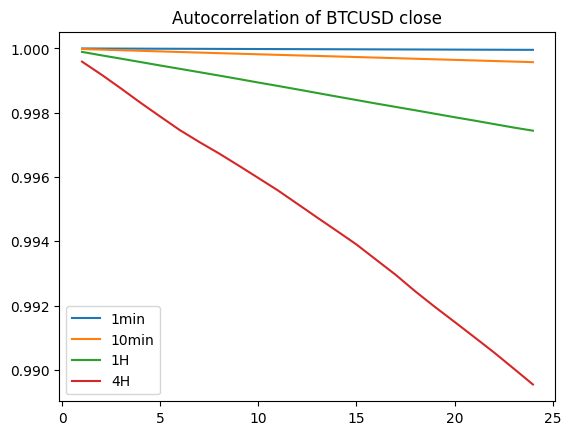

In [36]:
resample_freqs = ['1min', '10min', '1H', '4H'] #, '24H', '7D']
coin = 'BTCUSD'
ohlc_key = 'close'
lags = np.arange(1, 25, 1)


for freq in resample_freqs:
    resample_df = utils.ohlc_resampler(full_df, freq=freq, round = True, fill='ffill')
    autocorr = [resample_df[ohlc_key].autocorr(lag=lag) for lag in lags]
    plt.plot(lags, autocorr, label=freq)
    
plt.legend()
plt.title('Autocorrelation of '+coin+' '+ohlc_key)

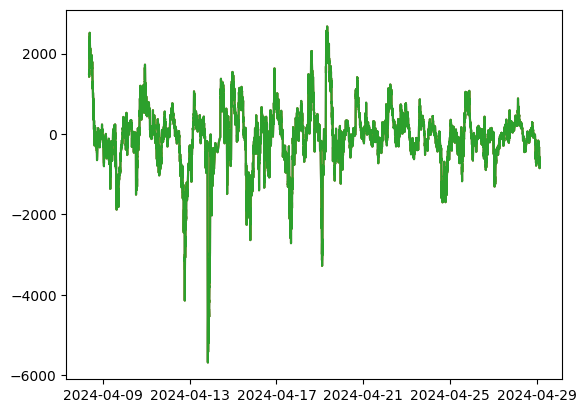

Text(0.5, 1.0, 'Autocorrelation of BTCUSD close')

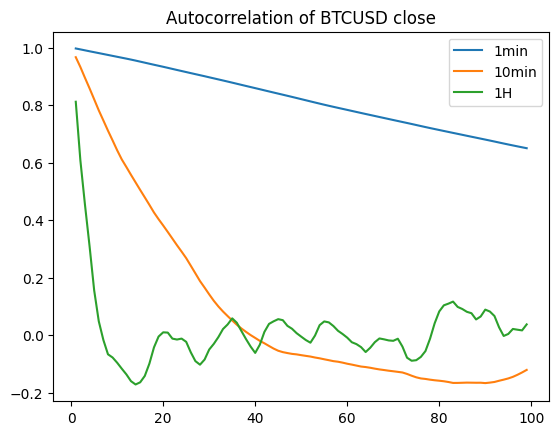

In [38]:
from datetime import datetime, timedelta

ohlc_key = 'close'

resample_freqs = ['1min', '10min', '1H'] #, '4H', '24H'] #, '7D']
lags = np.arange(1, 100, 1)
lookback = 30 #lookback in days

def subtract_ma(df, window):
    return df - df.rolling(window=window).mean()

def calc_autocor(sig, lag):
    #replace nans with mean
    sig = sig.fillna(sig.mean())
    return np.corrcoef(sig[:-lag], sig[lag:])[0,1]

df_lookback = full_df[datetime.now()-timedelta(days=lookback):]
df_lookback = subtract_ma(df_lookback, 500)

for freq in resample_freqs:
    resample_df = utils.ohlc_resampler(df_lookback, freq=freq, round = True, fill='ffill')
    plt.plot(df_lookback[ohlc_key])
plt.show()
    
for freq in resample_freqs:
    resample_df = utils.ohlc_resampler(df_lookback, freq=freq, round = True, fill='ffill')
    autocorr = [calc_autocor(resample_df[ohlc_key], lag) for lag in lags]
    plt.plot(lags, autocorr, label=freq)
    
plt.legend()
plt.title('Autocorrelation of '+coin+' '+ohlc_key)

Text(0.5, 1.0, 'Autocorrelation of BTCUSD close')

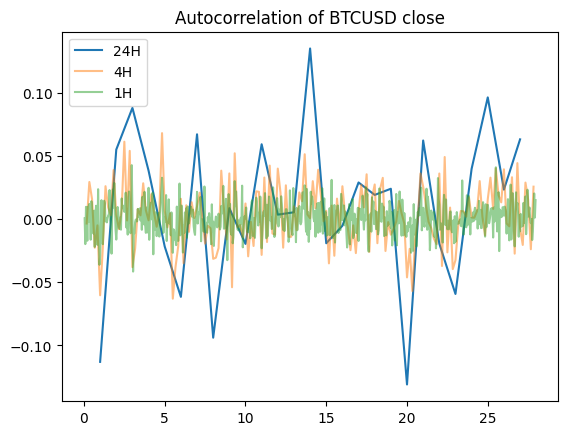

In [16]:
coin = 'BTCUSD'
ohlc_key = 'close'

freq = '24H'
lags = np.arange(1, 7*4, 1)
resample_df = utils.ohlc_resampler(full_df, freq=freq, round = True, fill='ffill')
autocorr = [resample_df[coin+'_'+ohlc_key].diff().autocorr(lag=lag) for lag in lags]
plt.plot(lags, autocorr, label=freq)

freq = '4H'
lags = np.arange(1, 7*4*6, 1)
resample_df = utils.ohlc_resampler(full_df, freq=freq, round = True, fill='ffill')
autocorr = [resample_df[coin+'_'+ohlc_key].diff().autocorr(lag=lag) for lag in lags]
plt.plot(lags / 6, autocorr, label=freq, alpha=0.5)

freq = '1H'
lags = np.arange(1, 7*4*24, 1)
resample_df = utils.ohlc_resampler(full_df, freq=freq, round = True, fill='ffill')
autocorr = [resample_df[coin+'_'+ohlc_key].diff().autocorr(lag=lag) for lag in lags]
plt.plot(lags / 24, autocorr, label=freq, alpha=0.5)
    
plt.legend()
plt.title('Autocorrelation of '+coin+' '+ohlc_key)

repeated autocorrelation

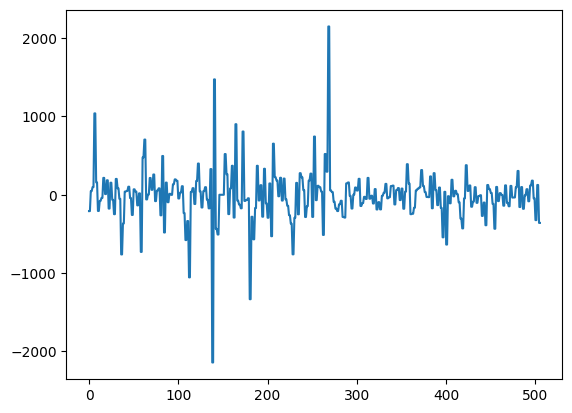

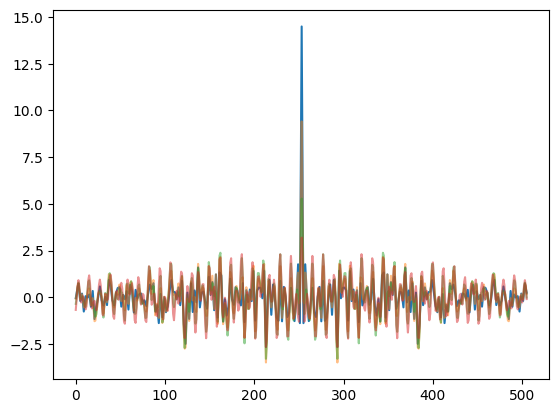

In [54]:

freq = '1H'
lookback = 30 #lookback in days
detrend_window = 100

df_lookback = full_df[datetime.now()-timedelta(days=lookback):]
df_lookback = subtract_ma(df_lookback, detrend_window)

resample_df = utils.ohlc_resampler(df_lookback, freq=freq, round = True, fill='ffill')

def normalize(sig):
    return (sig - sig.mean()) / sig.std()

signal = resample_df[ohlc_key].dropna().values
plt.plot(signal)
plt.show()

autocor = np.correlate(signal, signal, mode='same')
plt.plot(normalize(autocor))
for i in range(3):
    autocor = np.correlate(autocor, autocor, mode='same')
    plt.plot(normalize(autocor), alpha=0.5)
plt.show()
    
#plot fft



In [21]:
plt.plot(resample_df[coin+'_'+ohlc_key].values)
plt.plot(moving_average)

2022-04-14   NaN
2022-04-21   NaN
2022-04-28   NaN
2022-05-05   NaN
2022-05-12   NaN
              ..
2023-09-21   NaN
2023-09-28   NaN
2023-10-05   NaN
2023-10-12   NaN
2023-10-19   NaN
Name: BTCUSD_close, Length: 80, dtype: float64

autocorrelation of distance from moving average

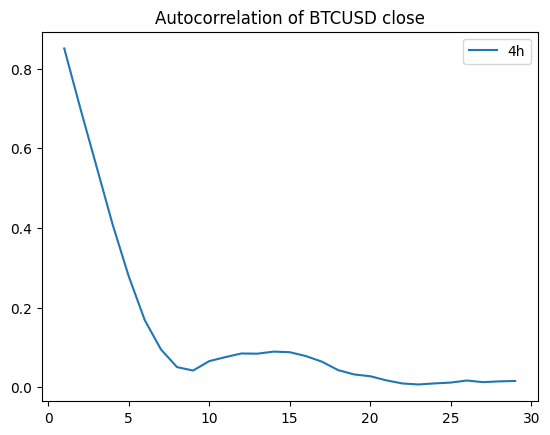

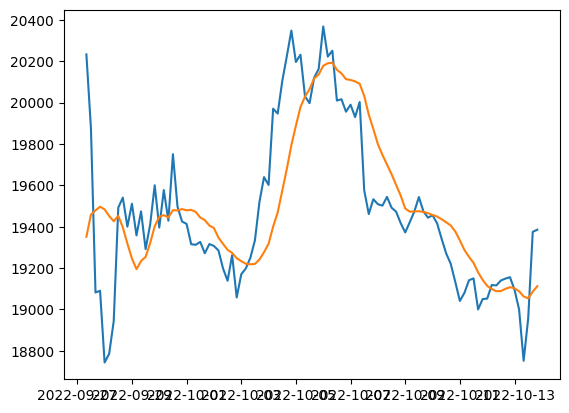

In [28]:
resample_freqs = ['4h'] #'1min', '10min', '1H', '4H', '24H']
coin = 'BTCUSD'
ohlc_key = 'close'
lags = np.arange(1, 30, 1)


for freq in resample_freqs:
    resample_df = utils.ohlc_resampler(full_df, freq=freq, round = True, fill='ffill')
    moving_average = resample_df[coin+'_'+ohlc_key].rolling(window=10).mean()
    autocorr = [(resample_df[coin+'_'+ohlc_key] - moving_average).autocorr(lag=lag) for lag in lags]
    plt.plot(lags, autocorr, label=freq)
    
plt.legend()
plt.title('Autocorrelation of '+coin+' '+ohlc_key)
plt.show()

plt.plot(resample_df[coin+'_'+ohlc_key][1000:1100])
plt.plot(moving_average[1000:1100])

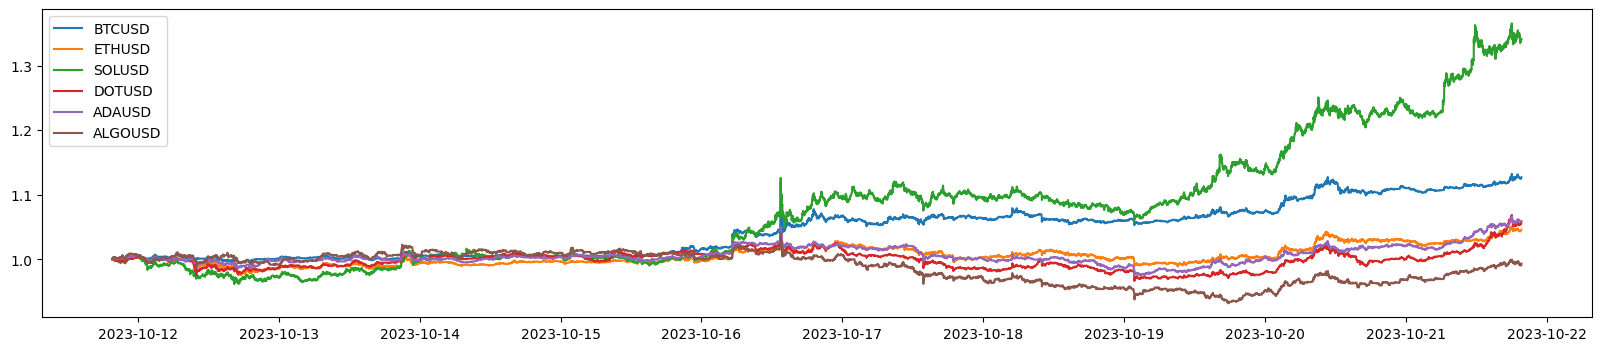

In [17]:
plt.rcParams['figure.figsize'] = [20, 4]

ohlc_key = 'close'
all_keys = [base_key] + list(other_keys)

for key in all_keys:
    plt.plot(utils.normalize_by_start(full_df[key + '_' + ohlc_key][-60*24*10:]))
plt.legend(all_keys)
plt.show()

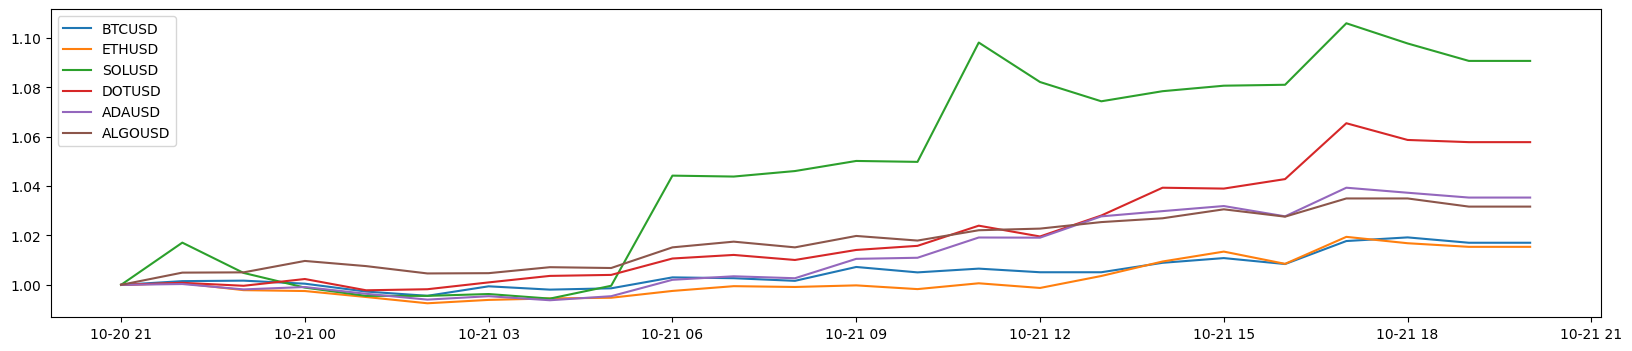

In [5]:
df_1h = utils.ohlc_resampler(full_df, freq='1H', round = True, fill='ffill')

plt.rcParams['figure.figsize'] = [20, 4]

ohlc_key = 'close'
all_keys = [base_key] + list(other_keys)

for key in all_keys:
    plt.plot(utils.normalize_by_start(df_1h[key + '_' + ohlc_key][-24:]))
plt.legend(all_keys)
plt.show()

In [14]:
resample_freqs = ['1min', '10min', '1H', '4H', '24H', '1D']
coin = 'SOLUSD'
ohlc_key = 'close'

for freq in resample_freqs:
    resample_df = utils.ohlc_resampler(full_df, freq=freq, round = True, fill='ffill')
    diffs = (np.diff(resample_df[key + '_' + ohlc_key].values) > 0).astype(int) * 2 - 1
    autocorr = np.dot(diffs[:-1], diffs[1:]) / len(diffs)
    print(freq, autocorr)
    

1min 0.5315497910750456
10min 0.04319646335980818
1H -0.010115390379139817
4H -0.001498800959232614
24H 0.008992805755395683
1D 0.008992805755395683


In [15]:
resample_freqs = ['1min', '10min', '1H', '4H', '24H', '1D']
coin = 'SOLUSD'
ohlc_key = 'close'

for freq in resample_freqs:
    resample_df = utils.ohlc_resampler(full_df, freq=freq, round = True, fill='ffill')
    diffs = (np.diff(resample_df[key + '_' + ohlc_key].values) > 0).astype(int)
    diffs = (diffs - np.mean(diffs)) / np.std(diffs)
    autocorr = np.dot(diffs[:-1], diffs[1:]) / len(diffs)
    print(freq, autocorr)
    

1min 0.13146264473522998
10min 0.03451531568505869
1H -0.011160314435574685
4H -0.0030458133666753677
24H 0.007706521350084062
1D 0.007706521350084062


In [8]:
resample_freqs = ['10min', '1H', '4H', '24H', '1D']
coin = 'SOLUSD'
ohlc_key = 'close'

for freq in resample_freqs:
    resample_df = utils.ohlc_resampler(full_df, freq=freq, round = True, fill='ffill')
    diffs = (np.diff(resample_df[key + '_' + ohlc_key].values) > 0).astype(int)
    autocorr = np.corrcoef(diffs[:-1], diffs[1:])[0,1]
    print(freq, autocorr)
    

10min 0.034515836835664476
1H -0.011161103839564035
4H -0.0030468982439001624
24H 0.007723714729949808
1D 0.007723714729949808


In [16]:
resample_freqs = ['1min', '10min', '1H', '4H', '24H', '1D']
coin = 'SOLUSD'
ohlc_key = 'close'

for freq in resample_freqs:
    resample_df = utils.ohlc_resampler(full_df, freq=freq, round = True, fill='ffill')
    diffs = resample_df[key + '_' + ohlc_key].diff().dropna()
    autocorr = np.dot(diffs[:-1], diffs[1:]) / len(diffs)
    print(freq, autocorr)

1min -2.566735906994054e-06
10min -4.028607630251261e-06
1H -2.750074554173525e-07
4H -1.682232682853716e-05
24H -1.2034994604316559e-05
1D -1.2034994604316559e-05
